<font size = 12 family=Verdana color=brown>Clustering (Customer Segmentation) Project</font>

# 1. Import Libraries, Load Dataset, Exploring Data

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder

sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## presumptions

1. CustormerID Field is unnecary
2. Gender field could be encode
3. Renaming some field will be helpful
4. Size = 200

In [3]:
# 1 Drop
df.drop(columns="CustomerID", inplace=True)

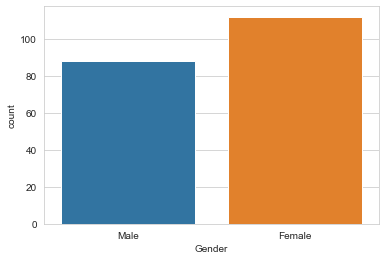

In [4]:
ax = sns.countplot(x=df.Gender);

In [5]:
# 2 Encoding
encoder = OrdinalEncoder()
encoder.fit(df[['Gender']])
df['genderEncoded'] = encoder.transform(df[['Gender']])
df = df.drop('Gender', axis=1)

df.head()

,Age,Annual Income (k$),Spending Score (1-100),genderEncoded
0,19,15,39,1.0
1,21,15,81,1.0
2,20,16,6,0.0
3,23,16,77,0.0
4,31,17,40,0.0


In [6]:
# Renamening
df.rename(columns={"Annual Income (k$)":"AnnualIncome",
                  "Spending Score (1-100)":"SpendingScore"}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            200 non-null    int64  
 1   AnnualIncome   200 non-null    int64  
 2   SpendingScore  200 non-null    int64  
 3   genderEncoded  200 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.4 KB


# 2. EDA for Unsupervised Analyze

## EDA Presumptions
1. Outlier check 
    a. Describe 
    b. Plots
2. Analyze pairplot for cluster prediction


In [8]:
df.describe()

,Age,AnnualIncome,SpendingScore,genderEncoded
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


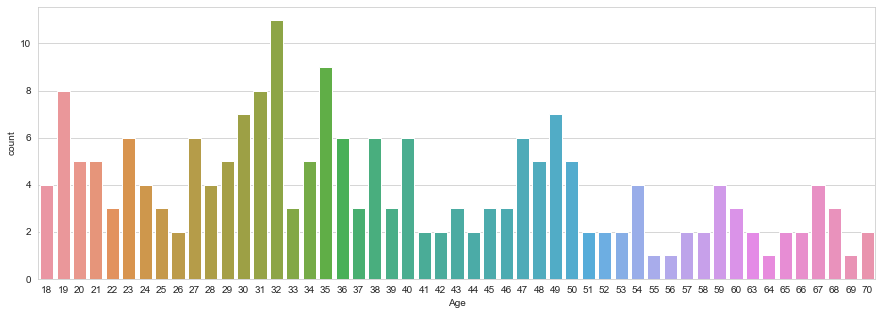

In [9]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x=df.Age)

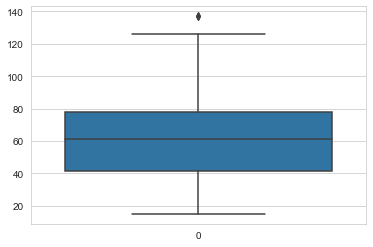

In [10]:
ax = sns.boxplot(df.AnnualIncome)

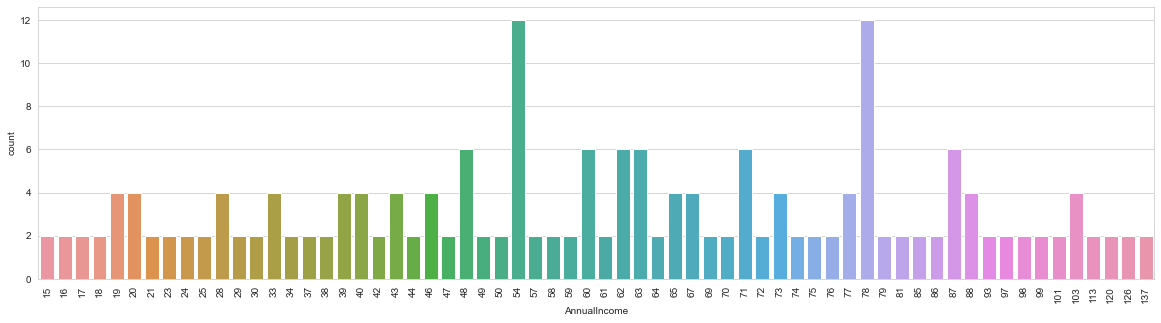

In [11]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df.AnnualIncome)
plt.xticks(rotation=90);

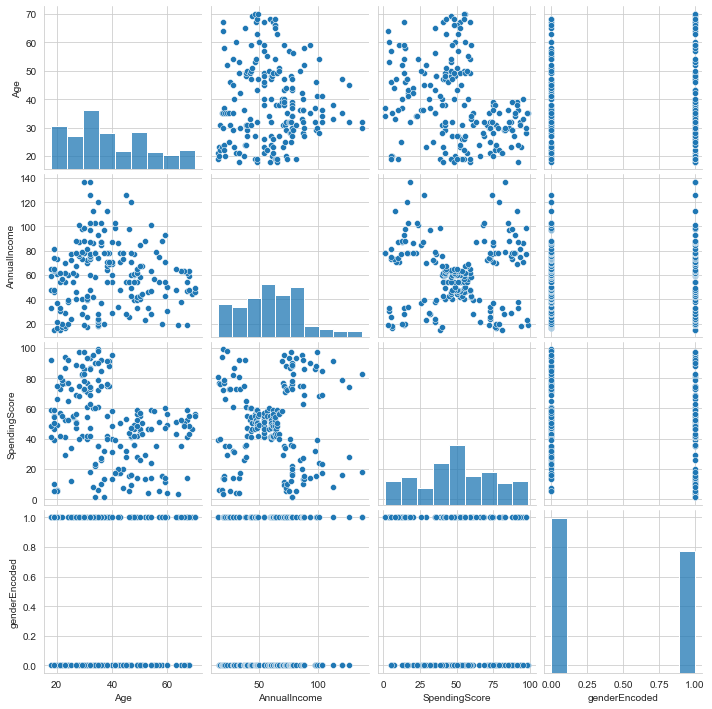

In [12]:
sns.pairplot(df);

In [13]:
df = df.drop('genderEncoded', axis=1)
df

,Age,AnnualIncome,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


## EDA Conclusion
- No missing value
- No outlier
- Gender type is not proprate for Clustring
- 3 fields left, it means we have three options such as ab|ac|bc or there are 3 2-element subsets that can be created from the set {1, 2, 3}, which are: {1, 2}, {1, 3}, and {2, 3}.
- PCA is unnecassary for this dataset

# 3. Cluster Analysis for K-Means Alghoritm

**1. Selecting ideal Pair**
To select ideal pair, there will be 2 test applied
1. **Pairplot** for visual prediction
2. **hopkins** for comparing scores


**2. Determine Cluster Size**
To determin cluster size for K-Means Alghoritm there will be 3 test aplied, which are:

1. **Elbow Method**
2. **Differenatials**
3. **Silhouette Score**

**3. Apply K-Means**<hr>
**4. Do all for X2**

## 3.1 Selecting Pairs

### 3.1.1. Pairplot for visual prediction

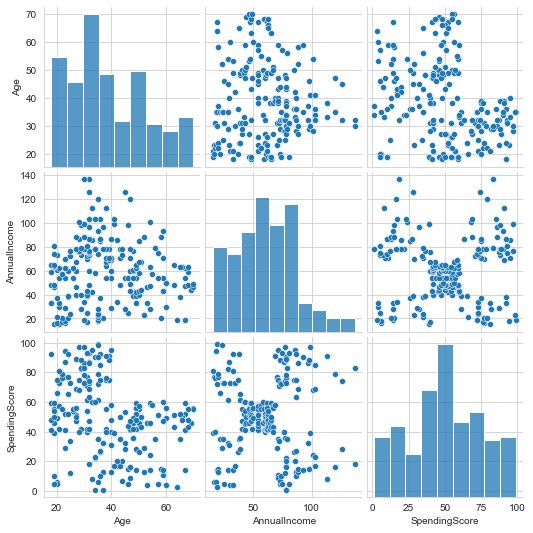

In [14]:
sns.pairplot(df);

**Pairplot winner**
Seems that between AnnualIncome and SpendingScore there could be 5 cluster 
And alos between Age and SpendingScore there could be 3 cluster

### 3.1.2 hopkins for comparing scores

In [15]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


# normalde bu fonksiyonumuz pyclustertend'ın hopkins kütüphanesinde var. Ancak oluşabilecek hatalara karşı 
# doğrudan fonksiyonun kendisini kullanacağız. Bundan dolayı pyclustertend'ı install etmemize gerek yoktur! 
                                                #!pip install pyclustertend --user
                                                # from pyclustertend import hopkins

In [16]:
# try 3 sub-cluster
X_Age_Spending = df.drop(columns="AnnualIncome") 
X_Age_Income = df.drop(columns="SpendingScore") 
X_Income_Spending = df.drop(columns="Age") 

In [17]:
hopkins(X_Age_Spending, df.shape[0])

0.3107209747700603

In [18]:
hopkins(X_Age_Income, df.shape[0])

0.3463591846353091

In [19]:
hopkins(X_Income_Spending, df.shape[0])

0.29184404384717794

**Hopkins winner**
is X_Income_Spending

In [20]:
X = X_Income_Spending

## 3.2 Determine Cluster Size

### 3.2.1 Elbow Method

In [21]:
from sklearn.cluster import KMeans

In [22]:
ssd = []
K = range(2, 11)
for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(X)
    ssd.append(model.inertia_)

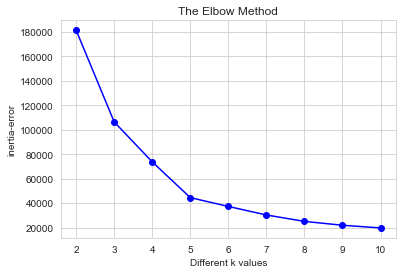

In [23]:
plt.plot(K, ssd, "ob-")

plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("The Elbow Method");

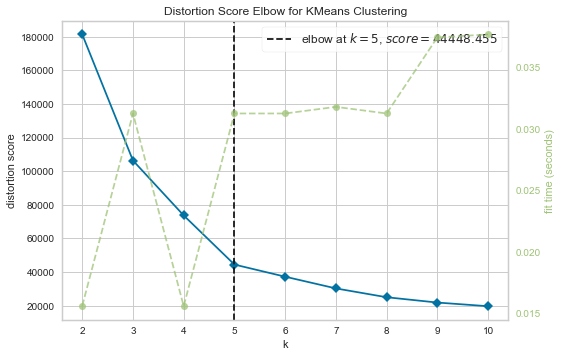

In [24]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,11))

visualizer.fit(X_Income_Spending)        # Fit the data to the visualizer
visualizer.show();

**5** is an ideal cluster size 

### 3.2.2 Differenatials

In [25]:
ssd

[181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156595,
 21850.165282585636,
 19672.07284901432]

In [26]:
pd.Series(ssd).diff()

0             NaN
1   -75015.222897
2   -32668.584023
3   -29231.333592
4    -7214.640937
5    -6974.157303
6    -5247.817858
7    -3161.674067
8    -2178.092434
dtype: float64

In [27]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,75015.222897
3,32668.584023
4,29231.333592
5,7214.640937
6,6974.157303
7,5247.817858
8,3161.674067
9,2178.092434


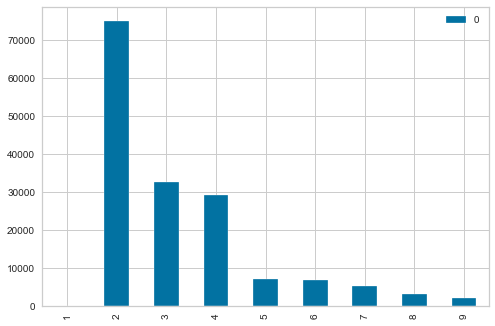

In [28]:
df_diff.plot(kind='bar');

there are **2** _radical downsizing seems_ **3** and **5**

### 3.2.3 Silhouette Score 

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_Income_Spending)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_Income_Spending, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


**n=5** is the biggest one

In [31]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

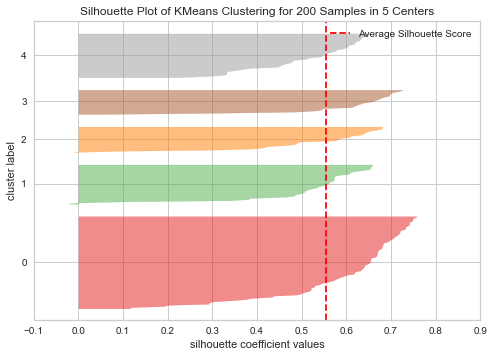

In [32]:
model5 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

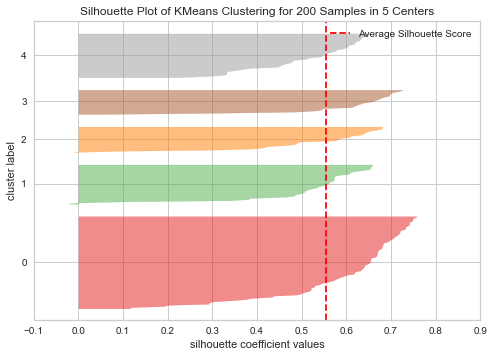

In [33]:
model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

## 3.3 Aplly K-Means

In [34]:
model = KMeans(n_clusters = 5, random_state = 42)
model.fit_predict(X_Income_Spending)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [35]:
model.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [36]:
cluster = model.labels_

In [37]:
X["PredictedClusters"] = cluster
X.head()

,AnnualIncome,SpendingScore,PredictedClusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


### 3.3.1 Viz K-Means

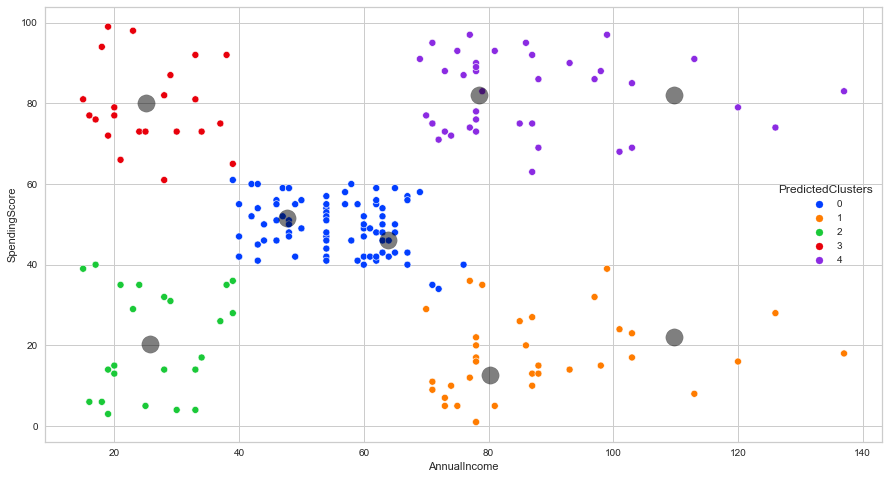

In [38]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='PredictedClusters', data=X, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

## 3.4 Apply for X2

In [39]:
X2 = X_Age_Spending
X2

,Age,SpendingScore
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [40]:
ssd2 = []

K = range(2, 11)

for k in K:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(X2)
    ssd2.append(model.inertia_)

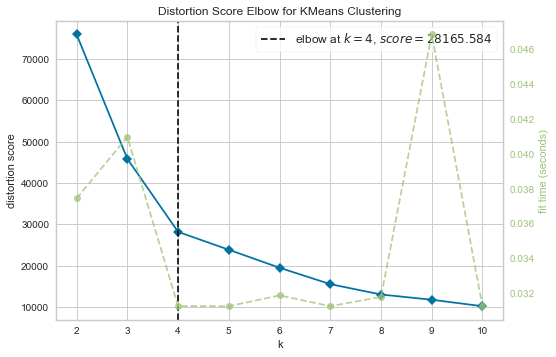

In [41]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,11))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

In [42]:
df_diff2 =pd.DataFrame(-pd.Series(ssd2).diff()).rename(index = lambda x : x+1)
df_diff2

,0
1,NaN
2,30108.479394
3,17675.093049
4,4327.334745
5,4355.130911
6,3968.924776
7,2507.709506
8,1268.463332
9,1564.980819


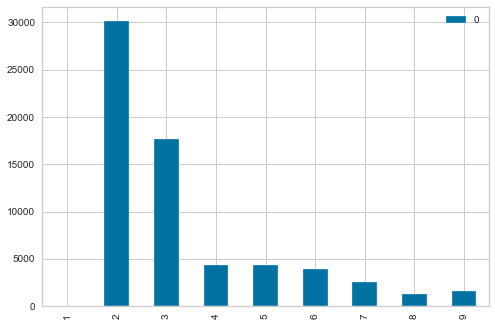

In [43]:
df_diff2.plot(kind='bar'); # the sharp decline stops is = 4

In [44]:
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


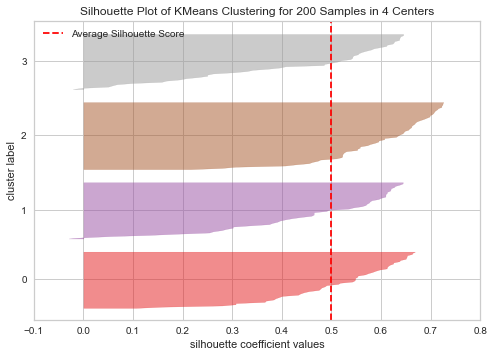

In [45]:
model4 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

In [46]:
#K-means apply
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit_predict(X2)
X2["PredictedClusters"] = kmeans.fit_predict(X2)
X2

,Age,SpendingScore,PredictedClusters
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


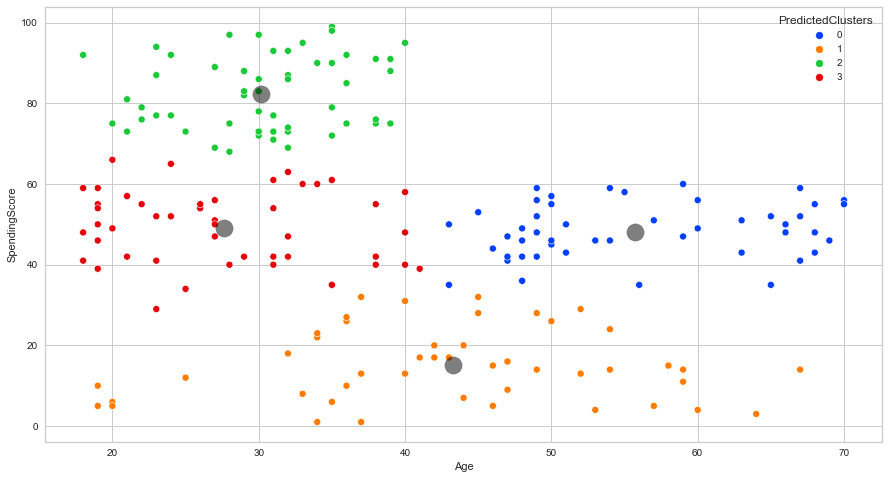

In [47]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='SpendingScore', hue='PredictedClusters', data=X2, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

# 4. Hierarchical Clustering

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

## 4.1 HC for X

In [49]:
H1 = df[["AnnualIncome","SpendingScore"]]

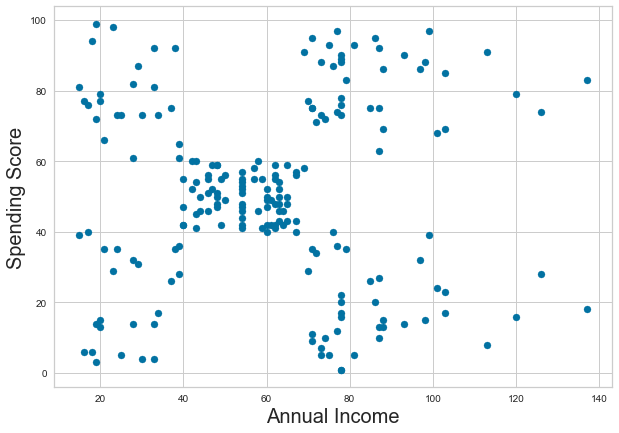

In [50]:
plt.figure(figsize=(10, 7))
plt.scatter(H1.AnnualIncome, H1.SpendingScore)
plt.xlabel("Annual Income", fontsize=20)
plt.ylabel("Spending Score", fontsize=20)
plt.show()

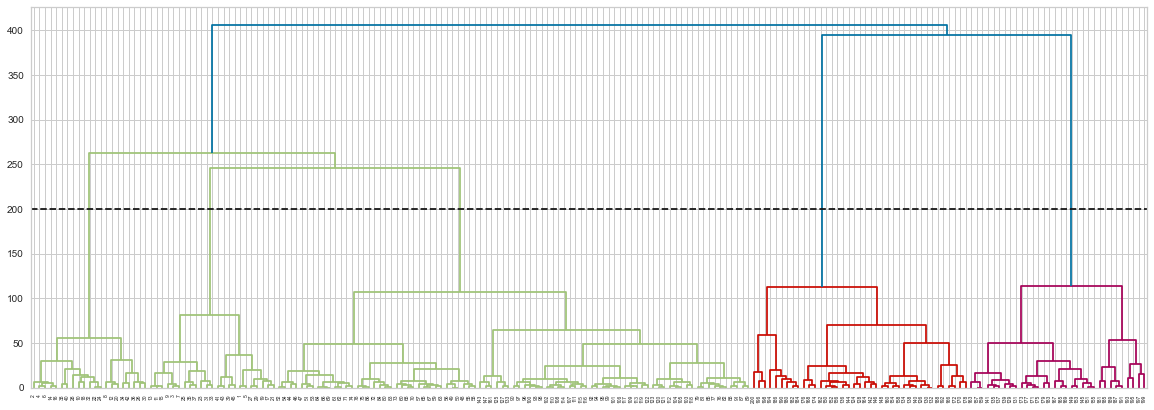

In [51]:
labels = range(1, 201) # first we have 200 cluster

linked = linkage(H1, 'ward') # ward selected 

plt.figure(figsize=(20, 7))
dendrogram(linked,
            orientation='top',
            labels=labels,
            show_leaf_counts=True)
plt.axhline(200, ls="--", c="k")
plt.show()

In [52]:
set1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
set1.fit(H1)

AgglomerativeClustering(n_clusters=5)

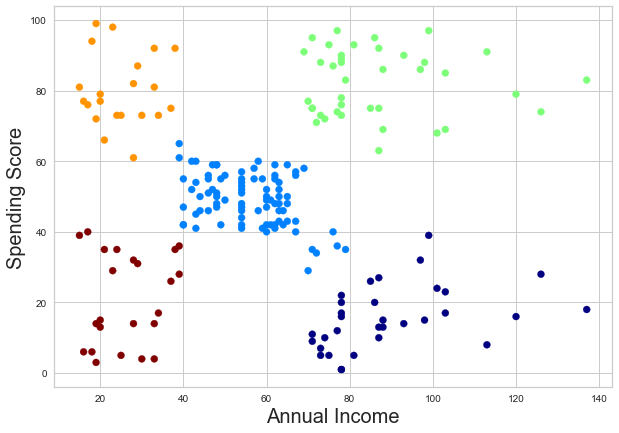

In [53]:
plt.figure(figsize=(10, 7))
plt.scatter(H1.AnnualIncome, H1.SpendingScore, c=set1.labels_, cmap='jet')
plt.xlabel("Annual Income", fontsize=20)
plt.ylabel("Spending Score", fontsize=20)
plt.show()

## 4.2 HC for X2

In [54]:
H2 = df[["Age","SpendingScore"]]

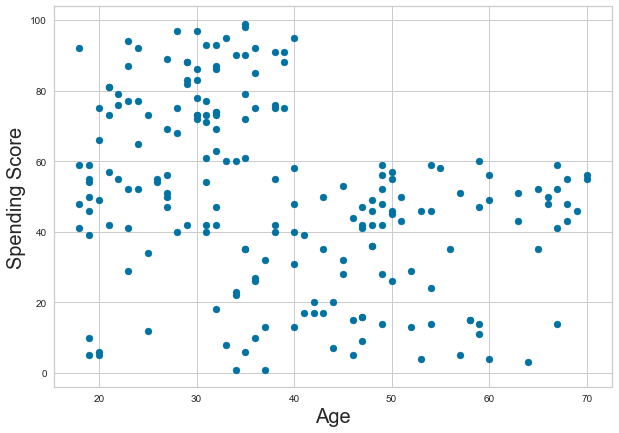

In [55]:
plt.figure(figsize=(10, 7))
plt.scatter(H2.Age, H2.SpendingScore)
plt.xlabel("Age", fontsize=20)
plt.ylabel("Spending Score", fontsize=20)
plt.show()

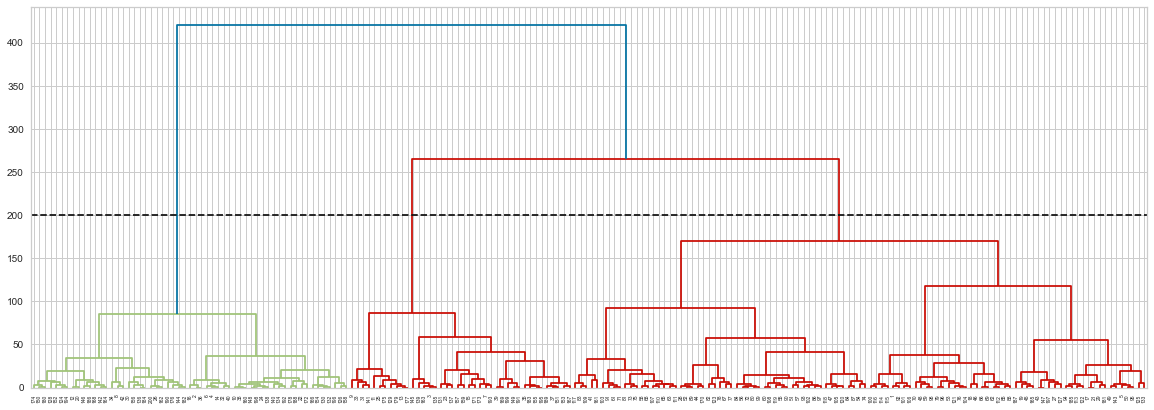

In [56]:
labels = range(1, 201) # first we have 200 cluster

linked = linkage(H2, 'ward') # ward selected 

plt.figure(figsize=(20, 7))
dendrogram(linked,
            orientation='top',
            labels=labels,
            show_leaf_counts=True)
plt.axhline(200, ls="--", c="k")
plt.show()

In [57]:
set2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
set2.fit(H2)

AgglomerativeClustering(n_clusters=3)

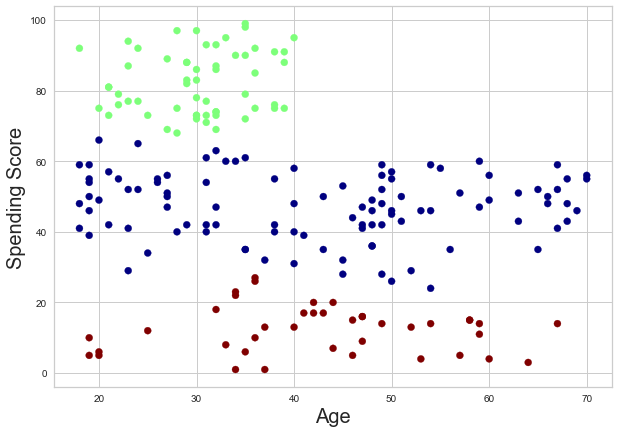

In [58]:
plt.figure(figsize=(10, 7))
plt.scatter(H2.Age, H2.SpendingScore, c=set2.labels_, cmap='jet')
plt.xlabel("Age", fontsize=20)
plt.ylabel("Spending Score", fontsize=20)
plt.show()

# 5. Conclusion

Bu ornekte iki farkli field ciftini inceledik. Gelir ve Harcama skoru arasindaki kumeleme oldukca net. Ancak yas ile harcama arasinda K-Means ve Hierchical yontemler farkli kumeler kurdu. Bunlari yorumlamak da mumkun. Ama benim gorusume gore bu veri de 5 sinif olarak ayrilmaliydi. Bu nedenle bu veri ciftini yorumlamak icin kullandigim yontemleri guvenli bulmuyorum. 
Asagida benim yaptigim siniflandirma gorunmektedir.
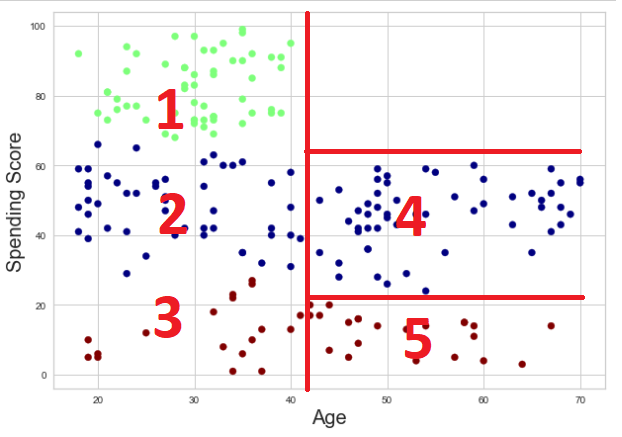

Bu sekilde olsaydi, harcama skilarini elit/normal/dusuk olarak siniflandirdigimizda, 42 yasindan sonra harcama skorlarinda elit grubun olmadigini soyleyebilirdik. 
<hr>
Daha guvenilir buldugum yillik gelir / harcama skoru eslesmesinde ise 5 grup hem gorsek hem de her 2 yontemde de ortak olarak cikti. Bu nedenle bu 5 grubu biraz daha inceleyelim


In [59]:
X

,AnnualIncome,SpendingScore,PredictedClusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


In [60]:
unique_values_count = X['PredictedClusters'].nunique()
unique_values_count

5

In [61]:
count_by_group = X.groupby('PredictedClusters')['AnnualIncome'].count()
count_by_group


PredictedClusters
0    81
1    35
2    23
3    22
4    39
Name: AnnualIncome, dtype: int64

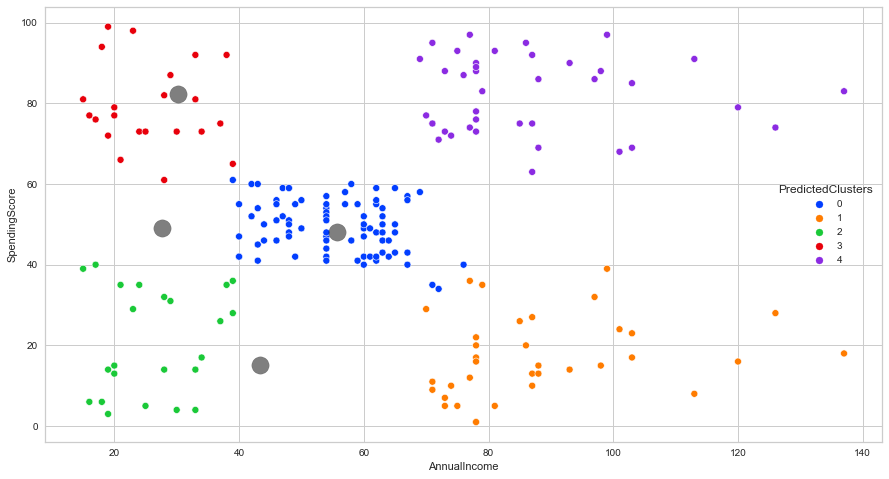

In [62]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue='PredictedClusters', data=X, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

0: Yillik geliri 40 ile 75K olan grup %40.5 ile en fazla grup. Bu grup yuksek veya dusuk harcama yapmiyor. Biraz biriktiren ama buyuk ihtimalle kira odemeyen grup.

1: Cok kazandigi halde az harcayan grup. Buyuk yatirimlar icin para biriktiyor olmalilar, onlara paralarini harcayabilecekleri buyuk yatirimlari sunmak iyi olackatir.

2: Bu grup az kazaniyor, az harciyor muhtemelen kendilerine maddi ya da egitim yatirimi yapip ust sinifa cikmak isteyen grup. Bunlara da dil ya da IT kursu sunulabilir ya da dusuk butce gayrimenkul sahiplenmeleri teklif edilebilir

3: burasi ilk para kazanmaya baslayan grup, alisveris meraklisi. fiyati dusuk her seyi alabilirler ama totalde cok harcama yaparlar

4: bunlar da hepimizin imrendigi iyi kazanip iyi haracayan grup. bunlara elit urunler sunulmali, baskalarinda olmayan harcama kalemleri uretilmeli 